## Dataset has different food items and amount of nutrients present in that food.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

#### Read the data

In [88]:
df = pd.read_csv('Nutrients.csv')
df.head()

,Food,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,Honeydew_Melon,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17
1,Potato,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78
2,Sweet Corn,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52
3,Celery,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20
4,Pomegranates,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30


#### Check for missing values

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Food          61 non-null     object 
 1   Calories      61 non-null     int64  
 2   Fat           61 non-null     float64
 3   Sodium        61 non-null     int64  
 4   Potassium     61 non-null     int64  
 5   Carbohydrate  61 non-null     float64
 6   Protein       61 non-null     float64
 7   Vitamin A     61 non-null     float64
 8   Vitamin C     61 non-null     float64
 9   Calcium       61 non-null     float64
 10  Iron          61 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 5.4+ KB


We can see that there are no missing values and the data types are also correct for our analysis.

#### Remove columns which are not required.

Food column does not help in our analysis, hence we remove this column from further analysis.

In [90]:
data = df.copy()

In [91]:
data.drop('Food',axis=1,inplace=True)
data.head()

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17
1,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78
2,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52
3,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20
4,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30


#### Check for outliers.

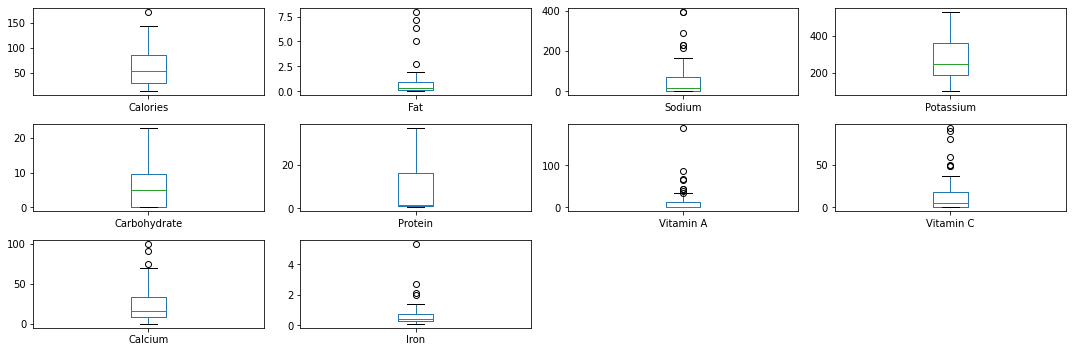

In [92]:
data.plot(kind='box',subplots=True,figsize=(15,5),layout=(3,4))
plt.tight_layout()
plt.show()

We can see that we have outliers and Hierarchical is effected by outliers.Hence we need to treat the outliers, we use capping method to treat the outliers.

In [93]:
for i in data.columns:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_viscor = Q1 - (1.5 * IQR)
    upper_viscor = Q3 + (1.5 * IQR)
    lower_limit = data[i].quantile(0.01) # 1% value is used to cap values below lower_viscor
    upper_limit = data[i].quantile(0.99) # 99% value is used to cap values above upper_viscor
    for j in data[i].index:
        if (data[i][j] > upper_viscor):
            data[i][j] = upper_limit
        elif (data[i][j] < lower_viscor):
            data[i][j] = lower_limit

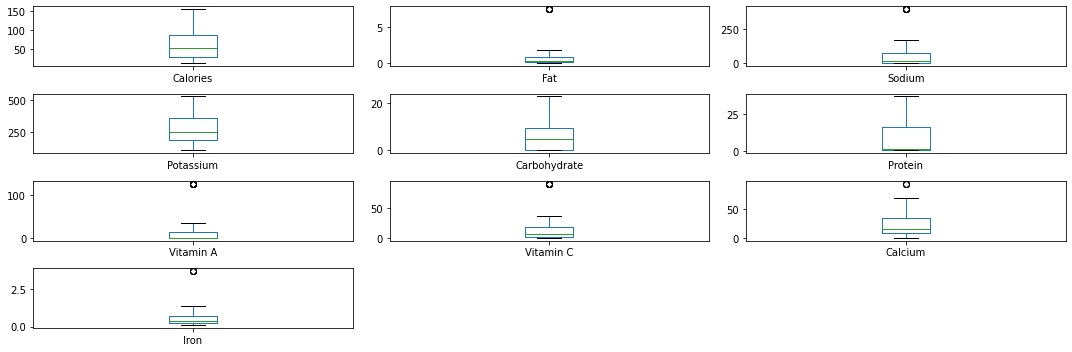

In [94]:
data.plot(kind='box',subplots=True,figsize=(15,5),layout=(4,3))
plt.tight_layout()
plt.show()

#### Scaling

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
ss = StandardScaler()
data_scale = pd.DataFrame(ss.fit_transform(data),columns=data.columns)
data_scale.head()

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,-0.686225,-0.454138,-0.423514,-0.409152,0.362252,-0.724182,2.531055,0.001875,-0.821303,-0.614042
1,0.376468,-0.479258,-0.528782,1.253583,1.650072,-0.574873,-0.439131,0.062628,-0.552625,0.094219
2,0.609742,0.068360,-0.449831,-0.047313,1.972026,-0.452153,-0.470890,-0.398384,-1.000421,-0.207663
3,-1.204612,-0.439066,0.120367,-0.133465,-0.637418,-0.708842,-0.470890,-0.530613,0.701205,-0.579209
4,0.531984,0.063336,-0.555099,-0.340230,1.923733,-0.608621,-0.470890,-0.276877,-0.642184,-0.463101


In [97]:
from sklearn.metrics.pairwise import euclidean_distances

#### Lets calculate cophenet coeff for diffenrent linkage 

In [98]:
best = {}
link = ['single','complete','average','ward']
for i in link:
    linkage_matrix = linkage(data_scale,method=i)
    euc_dist = euclidean_distances(data_scale)
    act_dist = euc_dist[np.triu_indices(data_scale.shape[0],1)]
    coeff, cophenet_dist = cophenet(linkage_matrix,act_dist)
    best[i] = coeff
best

{'single': 0.8420387278544373,
 'complete': 0.7608964679304289,
 'average': 0.8748068531392688,
 'ward': 0.7136511413982466}

we are getting max value for average, hence lets see dendrogram for this

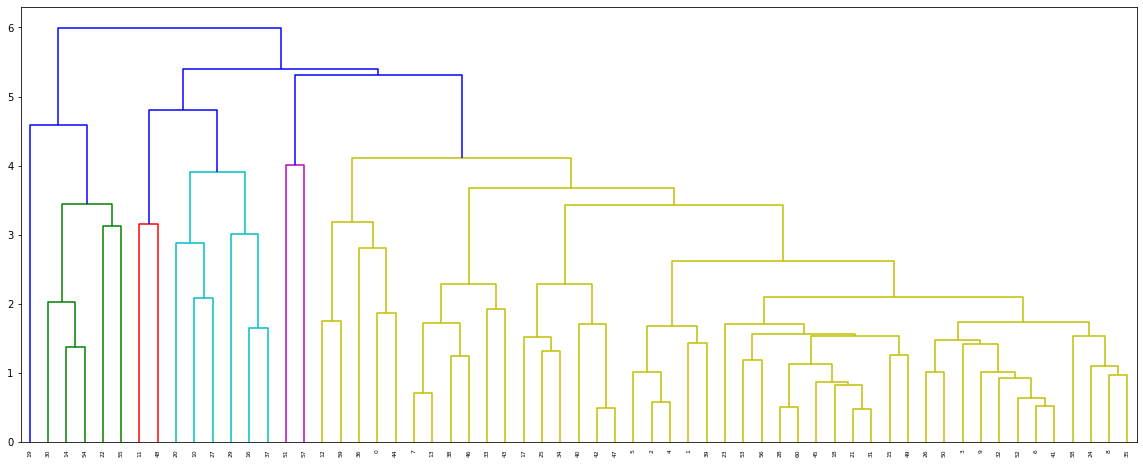

In [99]:
linkage_matrix = linkage(data_scale,method='average')
plt.figure(figsize=(20,8))
dendrogram(linkage_matrix)
plt.show()

In [100]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [101]:
from sklearn.cluster import AgglomerativeClustering

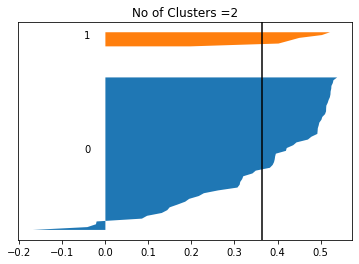

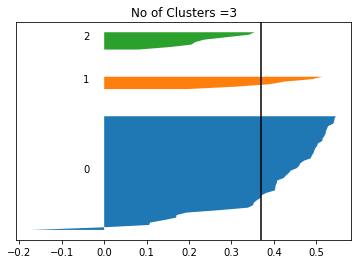

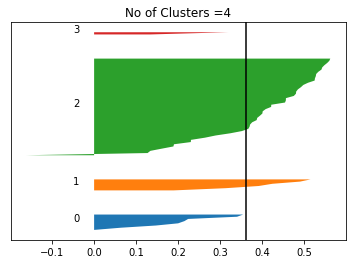

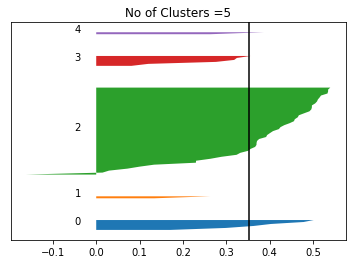

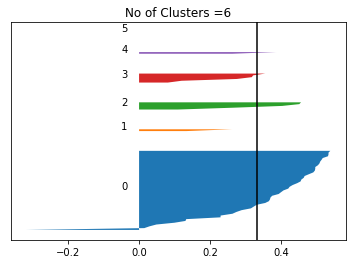

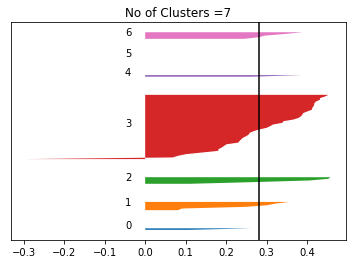

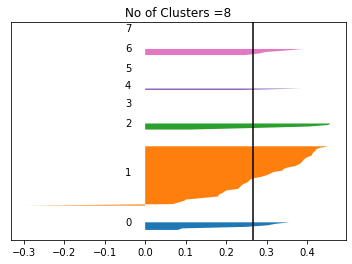

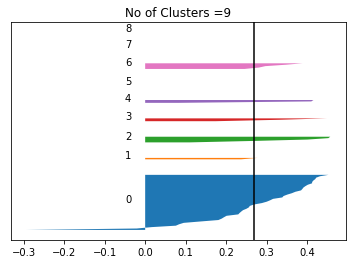

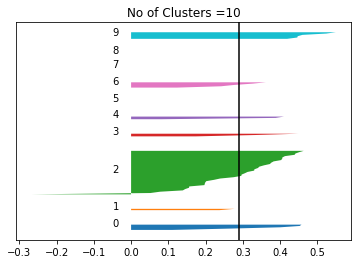

Size of each cluster for different No of Clusters {2: [55, 6], 3: [47, 6, 8], 4: [8, 6, 45, 2], 5: [6, 2, 45, 6, 2], 6: [45, 2, 5, 6, 2, 1], 7: [2, 6, 5, 40, 2, 1, 5], 8: [6, 40, 5, 1, 2, 1, 5, 1], 9: [40, 2, 5, 3, 3, 1, 5, 1, 1], 10: [5, 2, 34, 3, 3, 1, 5, 1, 1, 6]}


In [102]:
size={}
size1 = []
sil_score =[]
for i in range(2,11):    
    model = AgglomerativeClustering(n_clusters=i,linkage='average')
    model.fit(data_scale)
    predict = model.labels_
    score = silhouette_score(data_scale,predict)
    sil_score.append(score)
    sample = silhouette_samples(data_scale,predict)
    y_lower = 10
    fig, ax = plt.subplots()
    for j in range(i):
        cluster = sample[predict==j]
        cluster.sort()
        cluster_size = cluster.shape[0]
        size1.append(cluster_size)
        y_upper = cluster_size + y_lower
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,cluster)
        plt.text(-0.05,(cluster_size*0.5)+y_lower,j)
        y_lower = y_upper + 10
    size[i] = size1
    size1=[]
    plt.title('No of Clusters ='+str(i))
    ax.set_yticks([])
    ax.axvline(score,color='black')
    plt.show()
print('Size of each cluster for different No of Clusters',size)

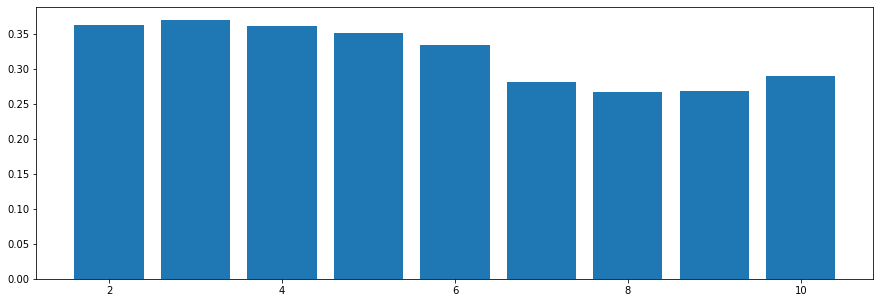

array([0.3633689 , 0.37020488, 0.36168411, 0.35208208, 0.33406023,
       0.28092438, 0.2672405 , 0.26809539, 0.28938993])

In [103]:
plt.figure(figsize=(15,5))
plt.bar(range(2,11),sil_score)
plt.show()
np.array(sil_score)

k=3 has highest silhouette score, but from the plot we can see that for k=3 individual silhouette coefficient are not crossing the silhouette score. Hence we choose k=2

#### Build model

In [104]:
model = AgglomerativeClustering(n_clusters=2,linkage='average')
model.fit(data_scale)
predict = model.labels_

In [105]:
df['Clusters'] = predict
df.head()

,Food,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron,Clusters
0,Honeydew_Melon,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17,0
1,Potato,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78,0
2,Sweet Corn,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52,0
3,Celery,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20,0
4,Pomegranates,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30,0


#### Visualization

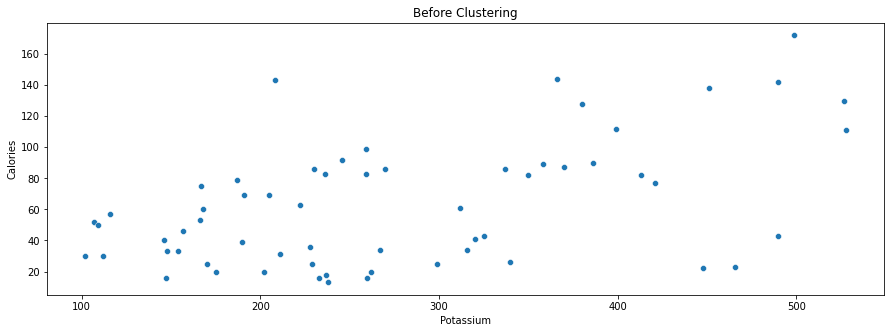

In [106]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['Potassium'],df['Calories'])
plt.title('Before Clustering')
plt.show()

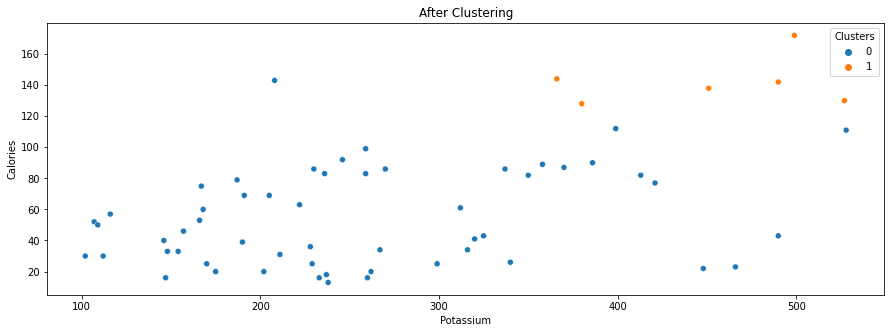

In [107]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['Potassium'],df['Calories'],hue=df['Clusters'])
plt.title('After Clustering')
plt.show()

#### Inference

In [108]:
df['Food'].nunique()

61

In [109]:
df.drop('Food',axis=1,inplace=True)

In [110]:
df.groupby('Clusters').agg('mean')

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
Clusters,,,,,,,,,,
0,54.072727,0.463273,54.981818,256.218182,7.486,5.982909,7.641291,16.750909,24.185455,0.632909
1,142.333333,4.973333,67.500000,452.166667,0.000,22.640000,57.296667,1.100000,22.833333,0.833333


Cluster 0: Large amount of Potassium is a part of this cluster and least is Fat.

Cluster 1: Large amount of Calories is a part of this cluster and least is Carbohydrate.